# Building decision trees for regression

In activity 1 we have seen how classification trees are built to predict churn rate. Let's look at regression trees next, which predict not a class outcome but a numeric one.

We will build a regression tree for a medical data set on diabetes progression.

## Dataset

We use a dataset included in scikit-learn. This returns a dataset as dictionary which contains the description:

In [1]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

The dataset also contains the independent and dependent variables which we put into a pandas dataframe:

In [2]:
X = pd.DataFrame(data=dataset['data'],columns=dataset['feature_names'])
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
y = pd.DataFrame(data=dataset['target'],columns=['progression'])
y.head()

,progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


The dependent variables looks like this:

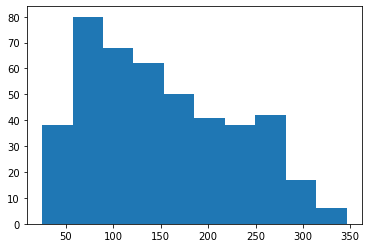

In [4]:
import matplotlib.pyplot as plt

plt.hist(y.values)
plt.show()

## Building the tree

We can almost use exactly the same code as for classification, except we use an instance of ```DecisionTreeRegressor```:

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

decision_tree = DecisionTreeRegressor()

# Again, have a look at the documentation:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

# Note that you can again choose your splitting criteria. In the lecture so far, we have only discussed the
# use of "squared_error" (the default). There might be situations in which from a theoretical point of view
# choosing another measure is more appropriate, but the principle stays the same.


decision_tree.fit(X_train,y_train)
prediction = decision_tree.predict(X_test)

print('RMSE:', np.sqrt(mse(y_test,prediction)))
print('Number of nodes:', decision_tree.tree_.node_count)

RMSE: 80.68354594628427
Number of nodes: 597


Remember that in our classification tree, we looked at accuracy and AUC as our measures of correctly predicting the classes. 

This time, we have a numeric outcome, so we can actually calculate the root mean squared error as a measure. This gives us the deviation of our predicted value from the observed value.


In class we discussed using RSS, which is a closely related error measure. RSS is the absolute sum of the squared errors, MSE is the mean of that value, and RMSE is the root square of MSE.
Choosing one over the other is a matter of preference.

Let's try building another tree that we are restricting a bit more. We can again choose the maximum depth and minimum number of observations that we want in our terminal nodes (leaves).

In [8]:
decision_tree2 = DecisionTreeRegressor(max_depth=3,min_samples_leaf=10)
decision_tree2.fit(X_train,y_train)
prediction = decision_tree2.predict(X_test)

print('RMSE:', np.sqrt(mse(y_test,prediction)))
print('Number of nodes:', decision_tree2.tree_.node_count)

RMSE: 63.45433356838929
Number of nodes: 15


The error metric is lower, and our tree is smaller.

Similarly to the classification tree that we saw earlier, we restricted how overfitted the tree becomes by restricting how deep it goes.

## Visualising the tree

We can also easily visualise our tree by using the following code that we saw previously.

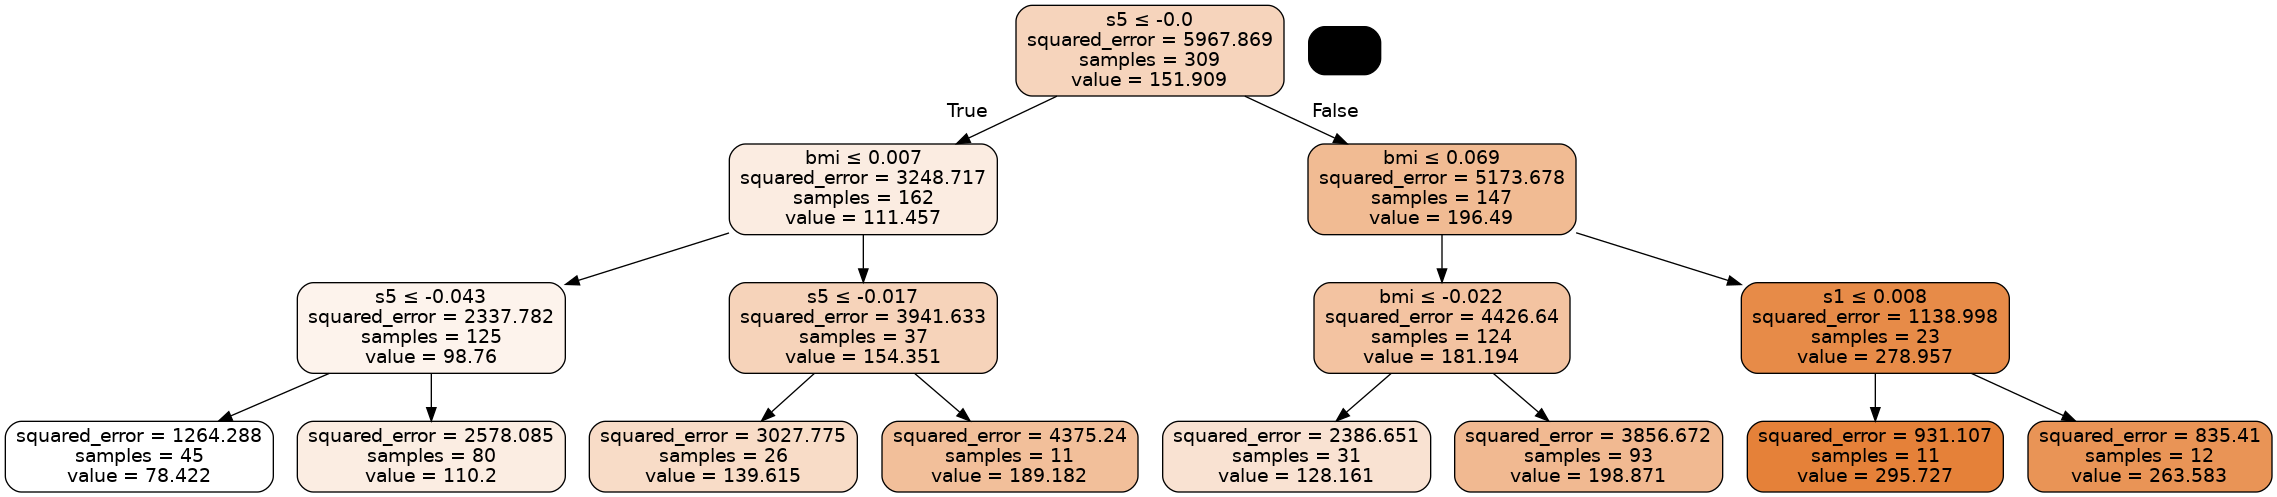

In [9]:
!pip install pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

# create a file to store the figure in
dot_data = StringIO()


export_graphviz(decision_tree2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X.columns)

# import and display the figure
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Remember that the value entry gives us the -average- of the dependent variable over all the samples in the leaf node.

Notice how some variables are chosen multiple times for splits, on the right side you will even see that BMI is chosen twice directly after itself. This is due to the greedy top down approach that we are using. We are not considering the past or future in our splits - we're just doing the best possible split in a given moment.